# Running 'ellipse' with sigma-clipping

In this example, we execute the basic fitting demonstrated in the `Isophote-intro/isophote_example1.ipynb` notebook, with the main difference that the fit is performed with sigma-clipping.

We start in the same way:

In [1]:
from astropy.io import fits
image = fits.open("M51.fits")
pixel_data = image[0].data

from photutils.isophote.ellipse import Ellipse
ellipse = Ellipse(pixel_data)

Centering on object....   Done. Found x0 = 257.0, y0 = 258.0


Sigma-clipping is implemented via parameters on the `fit_image` method. In this example, due to the significant contamination of the image by non-elliptical features, we apply quite aggressive clipping.

In [2]:
isophote_list = ellipse.fit_image(sclip=2., nclip=3)

#
# Semi-      Isophote         Ellipticity    Position     Grad.   Data  Flag Iter. Stop
# major        mean                           Angle        rel.                    code
# axis       intensity                                    error
#(pixel)                                     (degree)
#
  10.00     1089.59 ( 8.44)  0.102 (0.006)  65.93 ( 2.0)  0.191    60     0   20     0
  11.00     1044.70 ( 7.70)  0.132 (0.005)  72.93 ( 1.1)  0.150    65     0   10     0
  12.10      983.21 ( 5.88)  0.157 (0.003)  70.03 ( 0.6)  0.122    61     9   10     0
  13.31      916.06 ( 7.32)  0.157 (0.006)  49.90 ( 1.3)  0.216    70     7   50     2
  14.64      895.94 ( 6.87)  0.223 (0.004)  55.85 ( 0.7)  0.160    77     4   19     0
  16.11      868.99 ( 5.41)  0.282 (0.003)  51.85 ( 0.5)  0.152    76    10   12     0
  17.72      851.25 ( 5.75)  0.282 (0.003)  43.00 ( 0.3)  0.119    79    15   12     0
  19.49      731.82 ( 4.44)  0.154 (0.002)  32.80 ( 0.3)  0.082    88    25   11     0
  21.4

Note how the added stability provided by sigma-clipping allows the fit to proceed further outwards before sensing a too low signal-to-noise condition.

## Plotting results

Similar to what we did before in notebook `Isophote-intro/isophote_example1.ipynb`:

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['image.origin'] = 'lower'

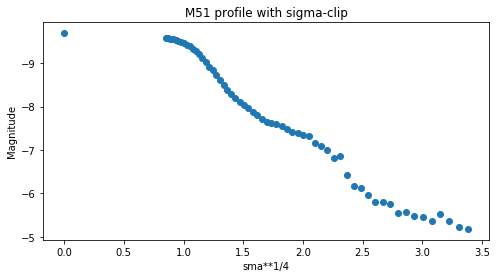

In [4]:
plt.figure(figsize=(8, 4))

plt.scatter(isophote_list.sma**0.25, -2.5*np.log10(isophote_list.intens))

plt.xlabel('sma**1/4')
plt.ylabel('Magnitude')
plt.gca().invert_yaxis()
plt.title("M51 profile with sigma-clip")

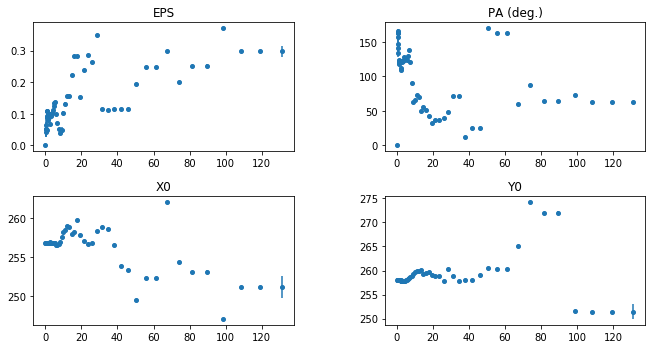

In [5]:
plt.figure(figsize=(10, 5))
plt.figure(1)

plt.subplot(221)
plt.errorbar(isophote_list.sma, isophote_list.eps, yerr=isophote_list.ellip_err, fmt='o', markersize=4)
plt.title('EPS')

plt.subplot(222)
plt.errorbar(isophote_list.sma, isophote_list.pa/np.pi*180., yerr=isophote_list.pa_err/np.pi* 80., fmt='o', markersize=4)
plt.title('PA (deg.)')

plt.subplot(223)
plt.errorbar(isophote_list.sma, isophote_list.x0, yerr=isophote_list.x0_err, fmt='o', markersize=4)
plt.title('X0')

plt.subplot(224)
plt.errorbar(isophote_list.sma, isophote_list.y0, yerr=isophote_list.y0_err, fmt='o', markersize=4)
plt.title('Y0')

plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.35, wspace=0.35)

Overplot a few "isophotes" on the image display:

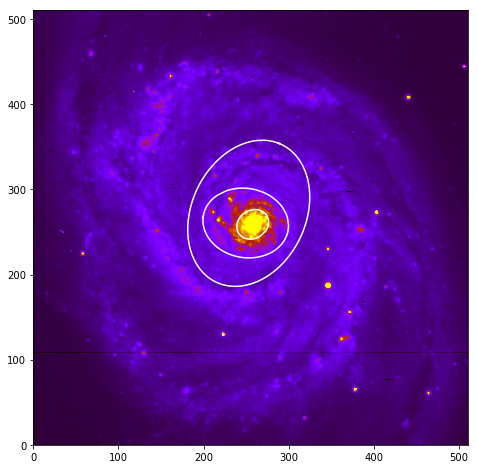

In [6]:
import matplotlib.cm as cm

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(pixel_data, cmap=cm.gnuplot, vmin=0, vmax=1000)
plt.axis([0,511,0,511])

iso1 = isophote_list.get_closest(20.)
iso2 = isophote_list.get_closest(50.)
iso3 = isophote_list.get_closest(90.)

x, y, = iso1.sampled_coordinates()
plt.plot(x, y, color='white')
x, y, = iso2.sampled_coordinates()
plt.plot(x, y, color='white')
x, y, = iso3.sampled_coordinates()
plt.plot(x, y, color='white')

Brightness samples associated with the three isophotes above are plotted next. 

Note that the angles in the raw sample arrays are defined w.r.t the semi-major axis position angle. To plot everything in the same coordinate system, we have to offset each isophote's angles array by the corresponding position angle.

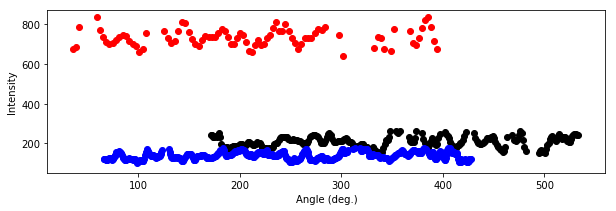

In [7]:
plt.figure(figsize=(10, 3))

plt.scatter((iso1.sample.values[0]+iso1.sample.geometry.pa)/np.pi*180., iso1.sample.values[2], color='red')
plt.scatter((iso2.sample.values[0]+iso2.sample.geometry.pa)/np.pi*180., iso2.sample.values[2], color='black')
plt.scatter((iso3.sample.values[0]+iso3.sample.geometry.pa)/np.pi*180., iso3.sample.values[2], color='blue')

plt.ylabel("Intensity")
plt.xlabel("Angle (deg.)")

Parameters that measure deviations from a perfect ellipse can be plotted like this:

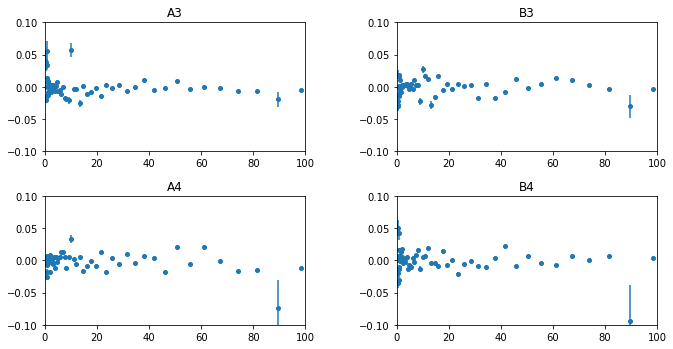

In [8]:
plt.figure(figsize=(10, 5))
plt.figure(1)
limits = [0., 100., -0.1, 0.1]

plt.subplot(221)
plt.axis(limits)
plt.errorbar(isophote_list.sma, isophote_list.a3, yerr=isophote_list.a3_err, fmt='o', markersize=4)
plt.title('A3')

plt.subplot(222)
plt.axis(limits)
plt.errorbar(isophote_list.sma, isophote_list.b3, yerr=isophote_list.b3_err, fmt='o', markersize=4)
plt.title('B3')

plt.subplot(223)
plt.axis(limits)
plt.errorbar(isophote_list.sma, isophote_list.a4, yerr=isophote_list.a4_err, fmt='o', markersize=4)
plt.title('A4')

plt.subplot(224)
plt.axis(limits)
plt.errorbar(isophote_list.sma, isophote_list.b4, fmt='o', yerr=isophote_list.b4_err, markersize=4)
plt.title('B4')

plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.35, wspace=0.35)